# Storage capacity of a simple perceptron

Storage capacity of machine learning models is anaylzed by a method in Stastical mechanics {cite}`gardner1988`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

In [2]:
def H(x):
    return erfc(x / np.sqrt(2)) * 0.5

def H_1st_deriv(x):
    return -np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

def H_2nd_deriv(x):
    return np.exp(-x**2 / 2) * x / np.sqrt(2 * np.pi)

def saddle_point_equation(alpha, kappa=0.0, q_init=0.5,
                          num_samples=100000, c=0.9, max_step=200):
    q = q_init

    step = 0
    eps = 1e-8
    error = 1e10
    while error > eps:
        step += 1
        q_prev = q

        # q
        z = np.random.randn(num_samples)
        x = (kappa - np.sqrt(q) * z) / np.sqrt(1 - q)
        h = H(x)
        indices = np.where(h != 0)[0]
        h = h[indices]
        x = x[indices]

        h1 = H_1st_deriv(x)
        h2 = H_2nd_deriv(x)
        int_z = (h1 / h)**2 - h2 / h
        q = alpha * np.mean(int_z)

        # qtilde
        qtilde = q / (1 - q)**2

        # Update
        q = (1 - c) * q + c * q_prev
        error = abs(q - q_prev)
        
        Qtilde = (1 - 2*q) / (1 - q)**2

        if q > 1.0:
            q = 1.0
            break
        if max_step is not None and step >= max_step:
            break

    print(f'step={step}, Qtilde={Qtilde}, qtilde={qtilde}, q={q}')
    return q

In [3]:
params = dict(
    num_samples=100000,
    c=0.99,
    max_step=1000,
)

alpha_list = [0.0, 0.5, 1.0, 1.5, 2.0]

alpha_q_hists = {}
for alpha in alpha_list:
    print(f'alpha={alpha}')
    q = saddle_point_equation(alpha, kappa=1.0, **params)
    alpha_q_hists[alpha] = q

alpha=0.0
step=1000, Qtilde=0.9999999995340407, qtilde=0.0, q=2.158562370532892e-05
alpha=0.5
step=801, Qtilde=0.5373326273852124, qtilde=1.1428611117978906, q=0.4048315426950762
alpha=1.0
step=1000, Qtilde=-20.574391619354625, qtilde=26.341073344259986, q=0.8228465636932442
alpha=1.5
step=210, Qtilde=-2387291405.2465324, qtilde=59.55624878953845, q=1.0
alpha=2.0
step=58, Qtilde=-2721684.4813690456, qtilde=146.29040847822128, q=1.0


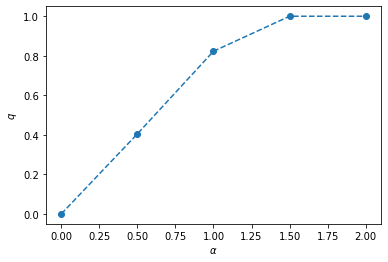

In [4]:
plt.plot(alpha_list, list(alpha_q_hists.values()), marker='o', linestyle='--')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$q$')
plt.show()

## Asymptotic form

In $q \rightarrow 1$,

$$
\alpha_{\mathrm{c}}(\kappa)=\left\{\int_{-\kappa}^{\infty} \mathrm{D} y(\kappa+y)^{2}\right\}^{-1}
$$

In [5]:
def critical_alpha(kappa, num_samples=100000):
    y = np.random.randn(num_samples)
    Dy = (kappa + np.where(-kappa <= y, y, 0))**2
    return 1 / np.mean(Dy)

In [6]:
kappa_list = np.linspace(0, 3, 50)

alpha_c_hists = []
for kappa in kappa_list:
    alpha_c = critical_alpha(kappa)
    alpha_c_hists.append(alpha_c)

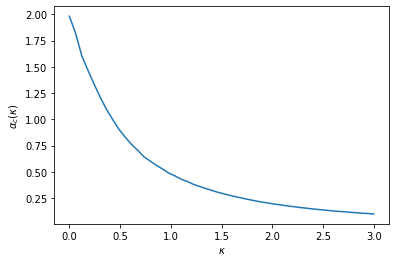

In [7]:
plt.plot(kappa_list, alpha_c_hists)
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\alpha_c(\kappa)$')
plt.show()

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```